Exercise 27

In [1]:
import random
import numpy as np
import math
import matplotlib.pyplot as plt
import matplotlib.mlab as mlab  
from scipy.stats import norm

In [28]:
#Use N(0,1) to generate N(0, \sigma^{2}) random variables via resample method using Multinormial for sampling N^{k}
def ResampleNormalMul(N, sigma):
    Y=np.random.normal(0,1,N)
    w=norm.pdf(Y, 0, sigma)/norm.pdf(Y, 0, 1)
    W=w/sum(w)
    NRes=np.random.multinomial(N, W)
    X=[]
    for i in range(N):
        X=X+[Y[i]]*NRes[i]
    return X, NRes    

In [80]:
#Use N(0,1) to generate N(0, \sigma^{2}) random variables via resample method using alternative rule (3.5) for sampling N^{k}
def ResampleNormalAlt1(N, sigma):
    Y=np.random.normal(0,1,N)
    w=norm.pdf(Y, 0, sigma)/norm.pdf(Y, 0, 1)
    W=w/sum(w)
    U=np.random.uniform(0,1,N)
    NRes=map(int, N*W)+(U<(N*W-map(int, N*W)))
    X=[]
    for i in range(N):
        X=X+[Y[i]]*NRes[i]
    return X, NRes 

In [612]:
#Use N(0,1) to generate N(0, \sigma^{2}) random variables via resample method using alternative rule (3.6) for sampling N^{k}
def ResampleNormalAlt2(N, sigma):
    Y=np.random.normal(0,1,N)
    w=norm.pdf(Y, 0, sigma)/norm.pdf(Y, 0, 1)
    W=w/sum(w)
    U=np.random.uniform(0,1,1)
    u=(range(N)+U)/N
    NRes=[]
    for i in range(N):
        if sum(NRes) < N:
            NRes.append((sum(W[0:(i+1)])>u[sum(NRes)])+int(N*(sum(W[0:(i+1)])-u[sum(NRes)]))*(sum(W[0:(i+1)])>u[sum(NRes)]))
        else:
            NRes.append(0)        
    X=[]
    for i in range(N):
        X=X+[Y[i]]*NRes[i]
    return X, NRes 

In [770]:
sigmas = [ 0.2,0.4,0.6, 0.8, 1, 1.2, 1.5, 2, 5 ]
niter = 100
N = 100
var = {'multi' : [], 'Alt1': [], 'Alt2' : [] }
for sigma in sigmas:
    NResMul=[]
    NResAlt1=[]
    NResAlt2=[]
    Y=np.random.normal(0,1,N)
    w=norm.pdf(Y, 0, sigma)/norm.pdf(Y, 0, 1)
    W=w/sum(w)
    W.sort()
    for i in range(niter):
        NResmul=np.random.multinomial(N, W)
        U1=np.random.uniform(0,1,N)
        NResalt1=map(int, N*W)+(U1<(N*W-map(int, N*W)))
        U=np.random.uniform(0,1,1)
        u=(range(N)+U)/N
        NResalt2=[]
        for i in range(N):
            if sum(NResalt2) < N:
                NResalt2.append((sum(W[0:(i+1)])>u[sum(NResalt2)])+int(N*(sum(W[0:(i+1)])-u[sum(NResalt2)]))*(sum(W[0:(i+1)])>u[sum(NResalt2)]))
            else:
                NResalt2.append(0)           
        NResMul.append(NResmul)
        NResAlt1.append(NResalt1)
        NResAlt2.append(NResalt2)
    NResMul = np.matrix(NResMul)
    NResAlt1 = np.matrix(NResAlt1)
    NResAlt2 = np.matrix(NResAlt2)
    var['multi'].append(np.std(NResMul, axis=0))
    var['Alt1'].append(np.std(NResAlt1, axis=0))
    var['Alt2'].append(np.std(NResAlt2, axis=0))
 

Plots for variance:

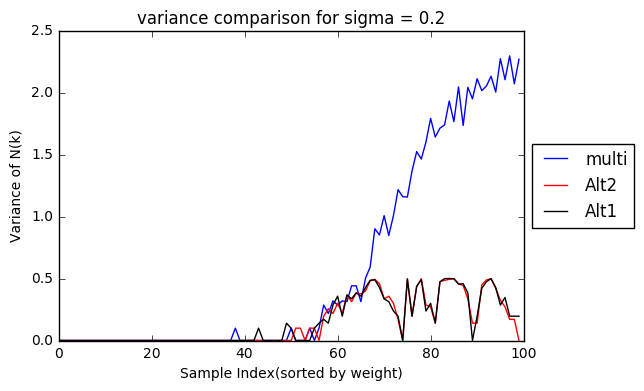

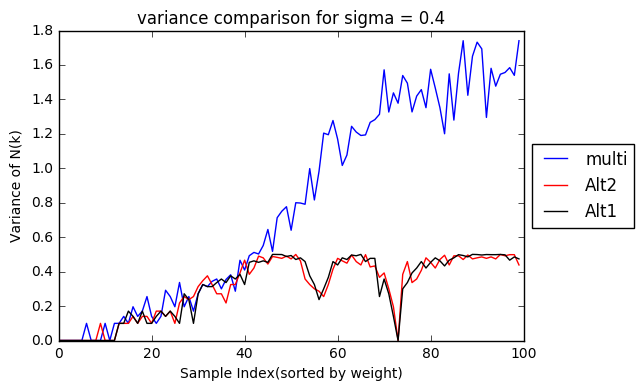

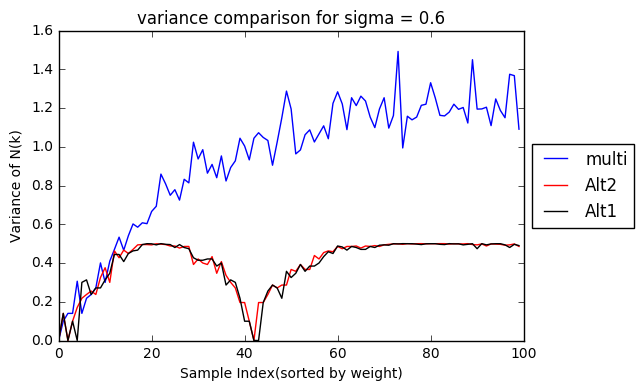

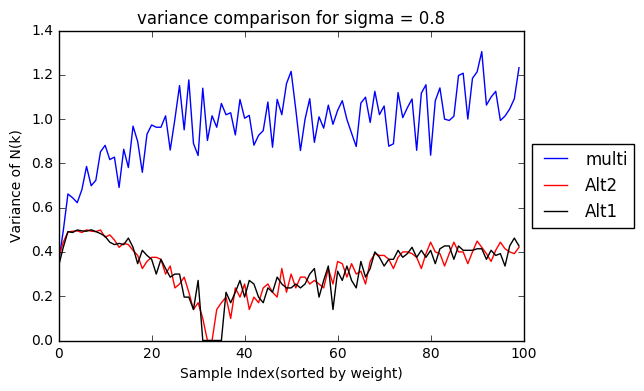

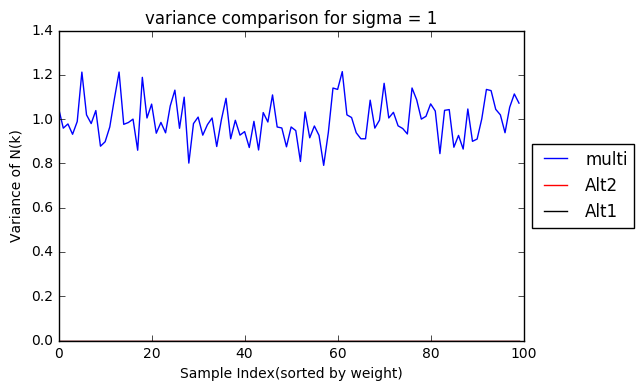

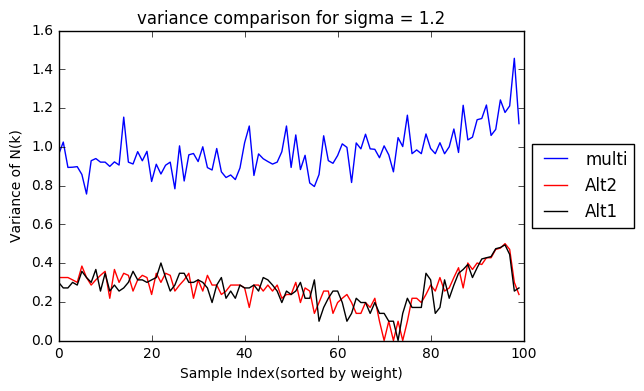

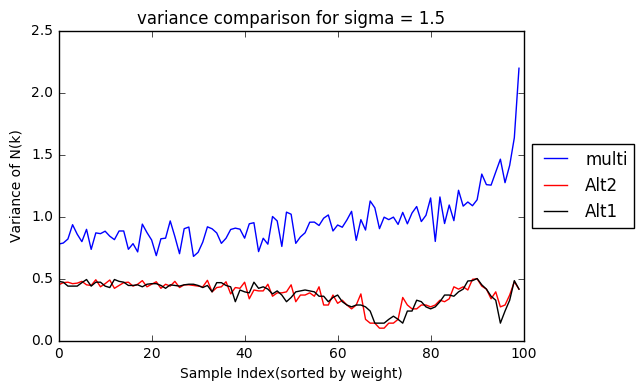

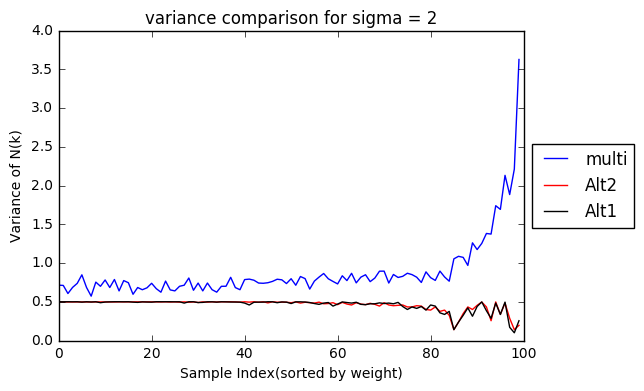

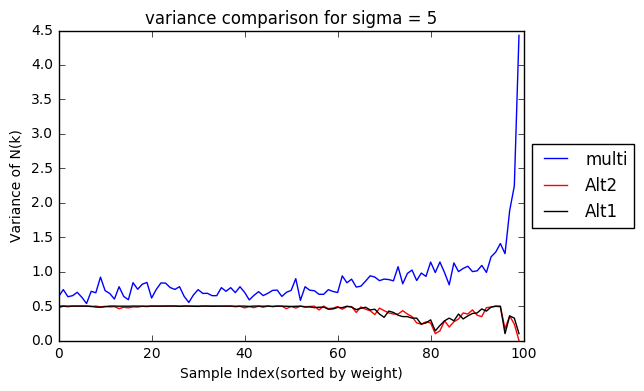

In [772]:
indices = range(N) 
cols = ['b-', 'r-', 'k-']
schemes = var.keys()

for i in range(len(sigmas)): 
    sigma = sigmas[i]
    title = "variance comparison for sigma = {}".format(sigma)
    lines = [] 
    for j, k in enumerate(schemes):
        line, = plt.plot( indices, np.squeeze(np.asarray(var[k][i])), cols[j])
        lines.append( line )
    plt.legend(lines, list(schemes), bbox_to_anchor = (1, 0.5), loc = 'center left' )
    plt.title(title)
    
    plt.xlabel('Sample Index(sorted by weight)')
    plt.ylabel('Variance of N(k)')
    plt.show()

We can see from the Plots above that, no matter values of sigma, variance of $N^{(k)}$ using Multinomial resampling scheme are bigger than those using (3.5) and (3.6). 

The variance are kind of robust to changing sigma. We can see that when sigma is 1, th variance using (3.5) and (3.6) are alomost 0. When sigma gets large, the difference of variances between different $N^{(k)}$ becomes small. That is ,when sigma is small(smaller than 1), $Var(N^{(k)})$ for large k tend to be large. But when sigma is big(larger than 2), almost all the $Var(N^{(k)})$ are 0.5.

Exercise 28

The function SAW(L,d,N) generates uniform measure on SAW(d).

Input:

L:size of lattice

d:length of walk

N:sample size

Output:

Y: SAW(d)

In [732]:
def SAW(L, d, N):
    #first point
    Y=list(np.random.randint(L, size=(N,2))) 
    Y=map(list, Y)
    Y=[[v] for v in Y]
    for n in range(d-1):
        m=[] 
        #for every sample Y_{n}^(k)
        for k in range(N):
            T1=[(Y[k][n][0]+0)%L, (Y[k][n][1]+1)%L]#Ti is potential Y_{n+1}^{k}
            T2=[(Y[k][n][0]+1)%L, (Y[k][n][1]+0)%L]
            T3=[(Y[k][n][0]+0)%L, (Y[k][n][1]-1)%L]
            T4=[(Y[k][n][0]-1)%L, (Y[k][n][1]+0)%L]
            Next=[]
            if T1 not in Y[k]:
                Next.append(T1)
            if T2 not in Y[k]:
                Next.append(T2)
            if T3 not in Y[k]:
                Next.append(T3)
            if T4 not in Y[k]:
                Next.append(T4)
            m.append(len(Next))
            if len(Next)>0:
                Y[k].append(random.choice(Next))  
        W=[(v+0.0)/sum(m) for v in m]
        NRes=np.random.multinomial(N, W)
        X=[]
        for i in range(N):
            for j in range(NRes[i]):
                X.append(np.copy(Y[i]).tolist())
        Y=X
    return Y

NorConZd(d, L) computes $Z_{d}$ for SAW(d) on Lattice if size L. 

The idea is that when sample size N goes to infinity, all possible chains should appeal in the sampling results. So we let N to be very big and count the number of differnt chains in the sampling results. This count should be $Z_{d}$.

In [747]:
def NorConZd(d, L):
    sawalk=SAW(L, d, 1000)
    z=1
    for i in range(1,len(sawalk)):
        if sawalk[i] not in sawalk[:i]:
            z=z+1
    return z

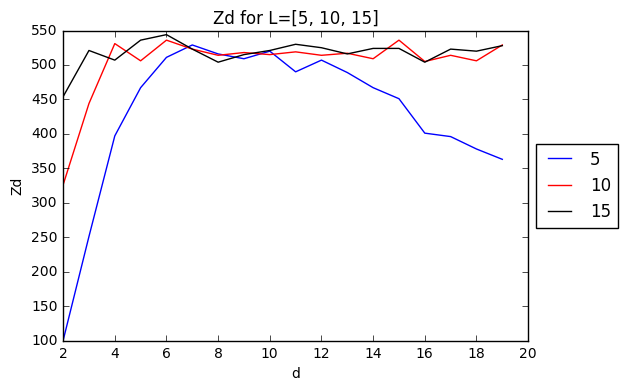

In [751]:
Ls=[5, 10, 15]
cols = ['b-', 'r-', 'k-']
d = range(2,20)

title = "Zd for L=[5, 10, 15]" 
lines = [] 
for i in range(len(Ls)): 
    L = Ls[i]
    z = [NorConZd(v, L) for v in d]
    line, = plt.plot( d , z, cols[i])
    lines.append( line )
plt.legend(lines, list(Ls), bbox_to_anchor = (1, 0.5), loc = 'center left' )
plt.title(title)
    
plt.xlabel('d')
plt.ylabel('Zd')
plt.show()

We can see from the plot that the speed of growth decrease with d. That is when d is small, $Z_{d}$ grow with d quickly. And the speed of growth decrease. When d is large enough, $Z_{d}$ is almost a constant. Then from some point, $Z_{d}$ decreases as d incerase. The changing point depends on L.